# Lecture 3: ML tools in Python

MTU Spring 2024

Instructor: Abel Reyes

### Announcements

- hw1 released. (Due this week Wednesday at 11:59pm.) 
    - Group submissions are not allowed for this assignment. 
    - Usually the deadlines will be on Wednesday
- Advice on keeping up with the material 
    - Practice! 
    - Make sure you run the lecture notebooks on your laptop. 
    - Start early on homework assignments.     
- Quiz I will be this FRIDAY! (take home quiz, 15 mins)
- HW2 will be released this Wednesday (01/24/24)
- Group formation Google Sheet is available for edition until this Friday (01/26/2024)

## SK-learn

![](img/sk_learn.png)

<!-- <img src="img/sk_learn.png" height="700" width="700">  -->

## Clustering - Unsupersived learning using ScikitLearn


### Poor clustering example (sensitive to initial random centroids)
![](img/poor_clustering.png)

<!-- <img src="img/sk_learn.png" height="700" width="700">  -->

### Ideal clustering example
![](img/ideal_clustering.png)

<!-- <img src="img/sk_learn.png" height="700" width="700">  -->

In [45]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_plusplus.html?highlight=plot_kmeans_plusplus
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [46]:
# Generate sample data
n_sample=4000
n_components=4

X, y_true = make_blobs(n_samples=1000, centers=4, cluster_std=0.6)
X=X[:,::-1]




In [47]:
#Calculate seeds from kmeans++
centers_init, indices=kmeans_plusplus(X, n_clusters=4, 
                                        random_state=0)

<function matplotlib.pyplot.show(close=None, block=None)>

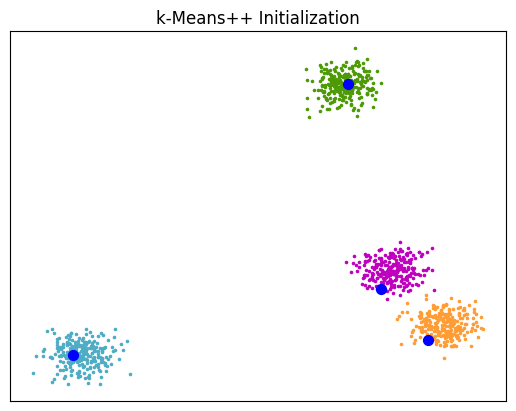

In [49]:
#Plot init seeds along side sample data
plt.figure(1)
colors=['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data=y_true==k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
               c=col, marker = '.', s=10)
    
plt.scatter(centers_init[:,0], centers_init[:,1], c='b', s=50)
plt.title("k-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show

## Pytorch

![](img/pytorch.png)

<!-- <img src="img/pytorch.png" height="700" width="700">  -->


Installation guide: https://pytorch.org/get-started/locally/ 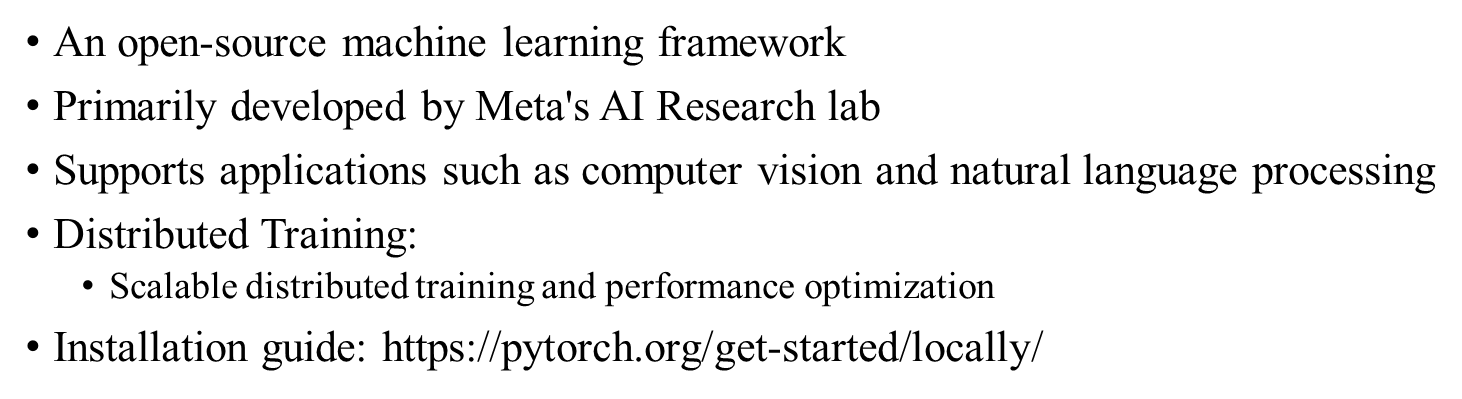

In [50]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

In [51]:
num_classes=10

In [12]:
#load an instance segmentation model pre-trained on COCO
model=torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

C:\Users\sanjay\anaconda3\envs\pytorch_cuda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\sanjay\anaconda3\envs\pytorch_cuda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to C:\Users\sanjay/.cache\torch\hub\checkpoints\maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:15<00:00, 11.7MB/s] 


In [52]:
# get number of input features for the classifier
in_features=model.roi_heads.box_predictor.cls_score.in_features

In [53]:
#replace the pre-trained head with a new one
model.roi_heads.box_predictor=FastRCNNPredictor(in_features, num_classes)

In [54]:
#now get the number of input features for the mask classifier
in_features_mask=model.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer=256

In [55]:
# and replace the mask predictor with a new one
model.roi_heads.mask_predictor=MaskRCNNPredictor(in_features_mask,
                                               hidden_layer,
                                               num_classes)

In [56]:
model

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [ ]:
### Segmentation model

In [57]:
import torch
from torchvision import transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the pretrained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the image transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load an example image from the "data" folder
image_path = "data/test_images/11.jpeg"
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make predictions
with torch.no_grad():
    predictions = model(image_tensor)



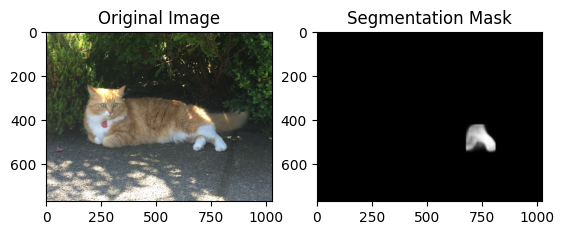

In [58]:
# Get the segmentation masks
masks = predictions[0]['masks'].detach().cpu().numpy()

# Visualize the original image
plt.subplot(1, 2, 1)
plt.imshow(np.array(image))
plt.title('Original Image')

# Visualize the segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(masks[0, 0], cmap='gray')  # Assuming a single instance mask
plt.title('Segmentation Mask')

plt.show()

In [30]:
## detection model

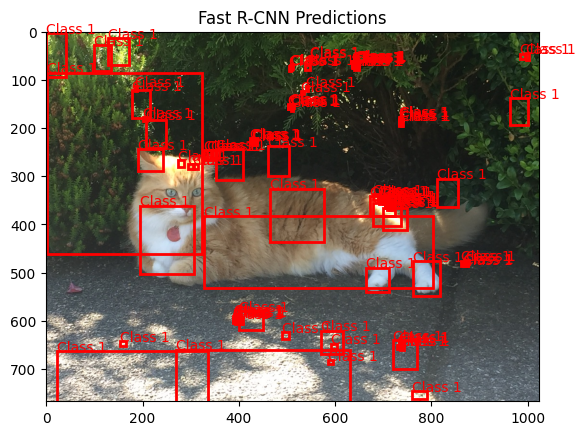

In [38]:
import torch
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the pretrained Fast R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Modify the box predictor for custom classification
num_classes = 3  # Replace with the desired number of classes
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Define the image transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load an example image from the "data" folder
image_path = "data/test_images/11.jpeg"
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make predictions
with torch.no_grad():
    predictions = model(image_tensor)

# Visualize the original image with predicted bounding boxes and labels
image_np = np.array(image)
plt.imshow(image_np)

for box, label in zip(predictions[0]['boxes'], predictions[0]['labels']):
    box = box.int().cpu().numpy()
    rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], edgecolor='r', linewidth=2, fill=False)
    plt.gca().add_patch(rect)
    plt.text(box[0], box[1], f'Class {label}', color='r')

plt.title('Fast R-CNN Predictions')
plt.show()


## Keras

![](img/keras.png)

<!-- <img src="img/keras.png" height="700" width="700">  -->



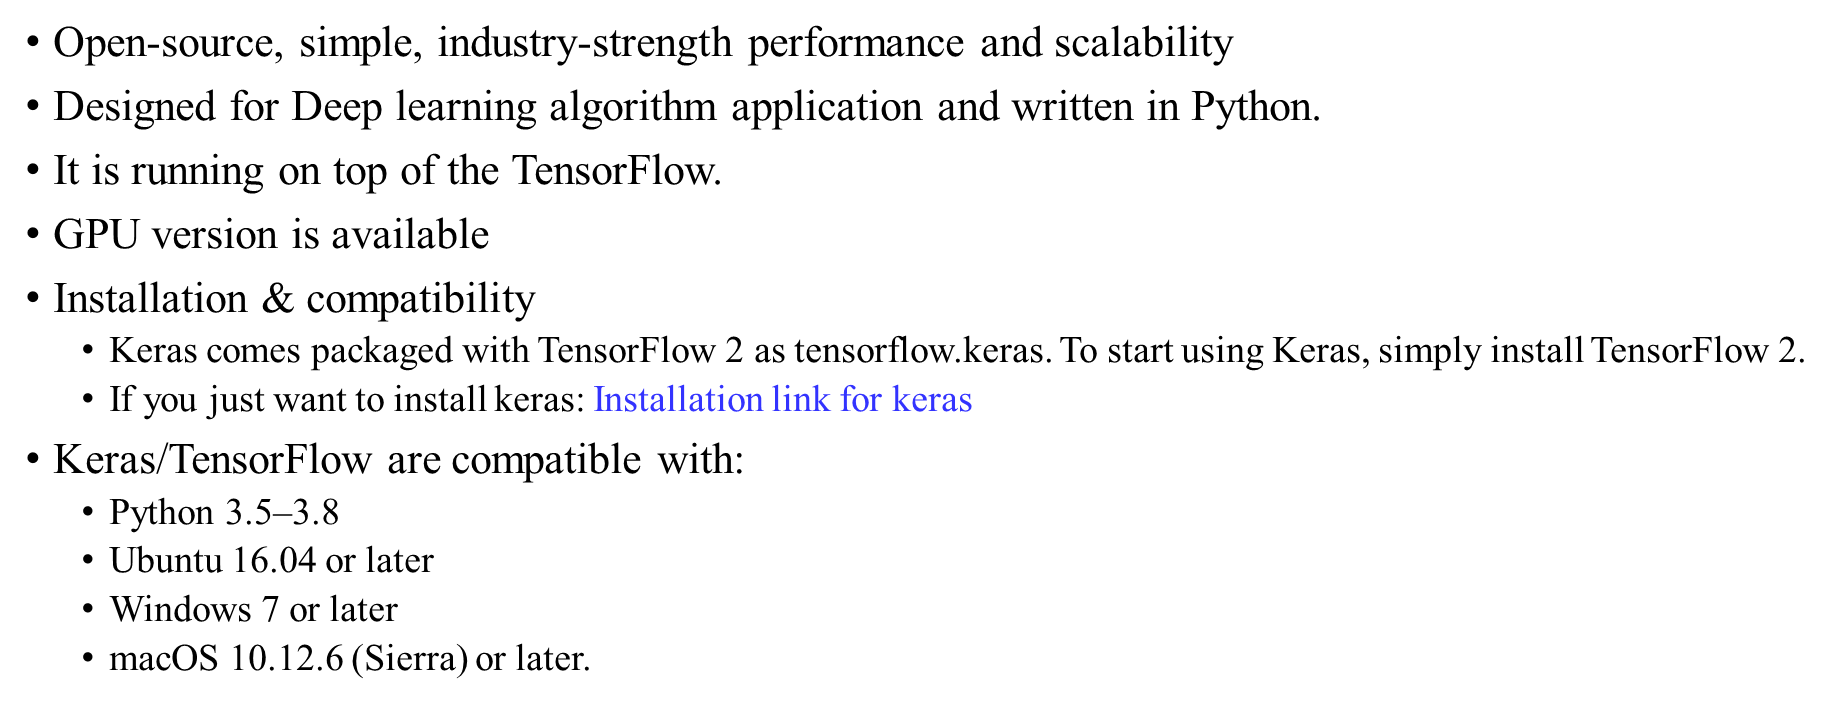

In [61]:
#https://keras.io/examples/vision/autoencoder/
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """Adds random noise to each image in the supplied array."""
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

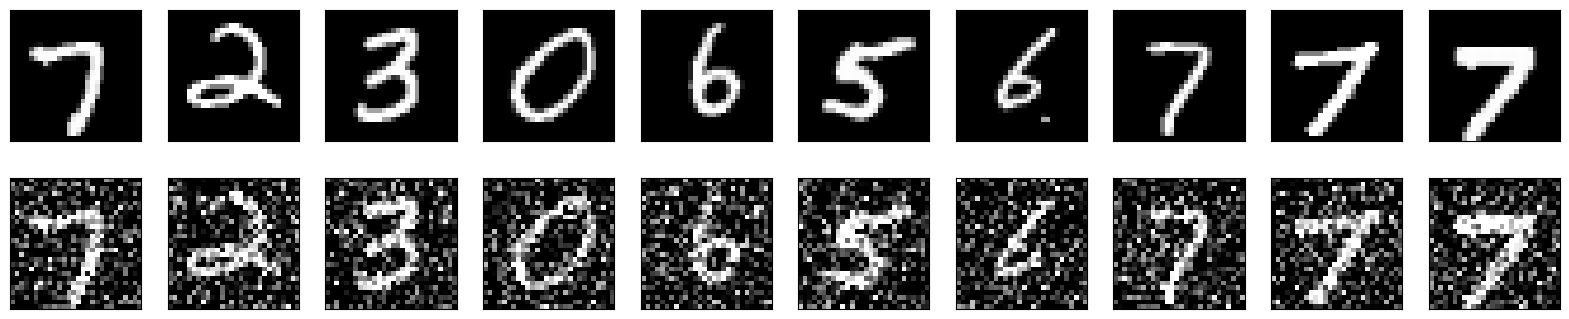

In [62]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [63]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [64]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 11s 7ms/step - loss: 0.1314 - val_loss: 0.0730
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0714 - val_loss: 0.0694
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0692 - val_loss: 0.0680
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0681 - val_loss: 0.0672
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0673 - val_loss: 0.0665
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0668 - val_loss: 0.0660
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0663 - val_loss: 0.0656
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0659 - val_loss: 0.0654
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0657 - val_loss: 0.0651
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0654 - val_loss: 0.064

313/313 [==============================] - 1s 2ms/step


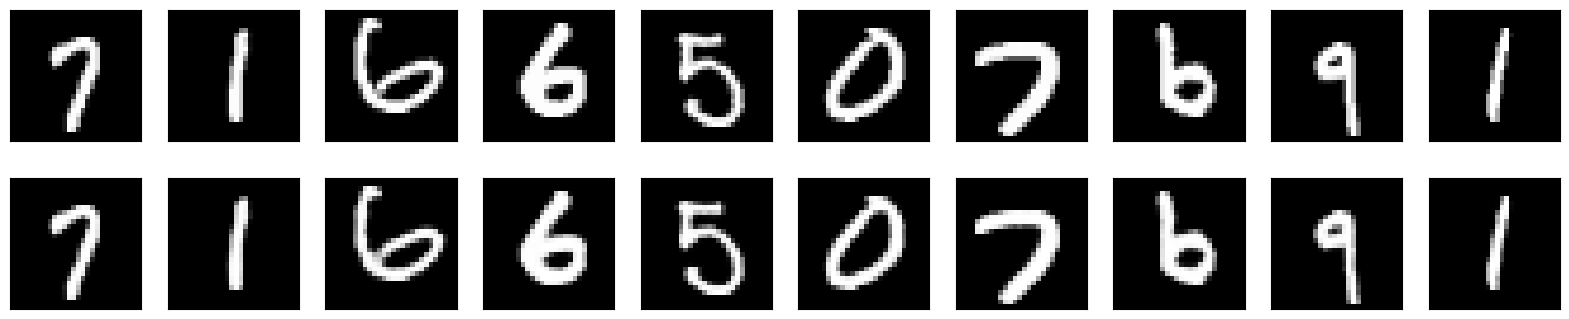

In [65]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [66]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1031 - val_loss: 0.0942
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0938 - val_loss: 0.0920
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0921 - val_loss: 0.0907
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0910 - val_loss: 0.0899
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0903 - val_loss: 0.0891
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0897 - val_loss: 0.0887
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0892 - val_loss: 0.0883
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0887 - val_loss: 0.0878
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0883 - val_loss: 0.0875
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0880 - val_lo

313/313 [==============================] - 1s 2ms/step


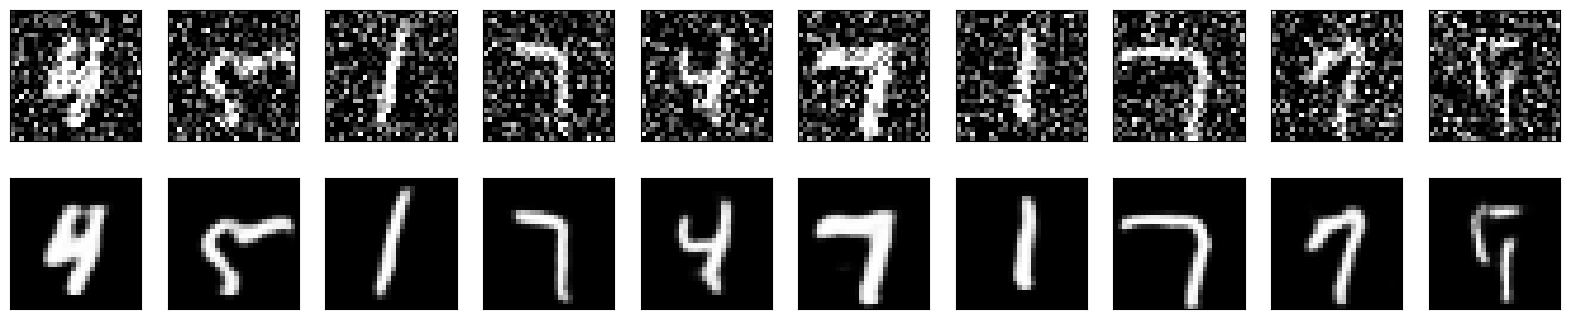

In [67]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

## Tensorflow

![](img/tensorflow.png)

<!-- <img src="img/tensorflow.png" height="700" width="700">  -->




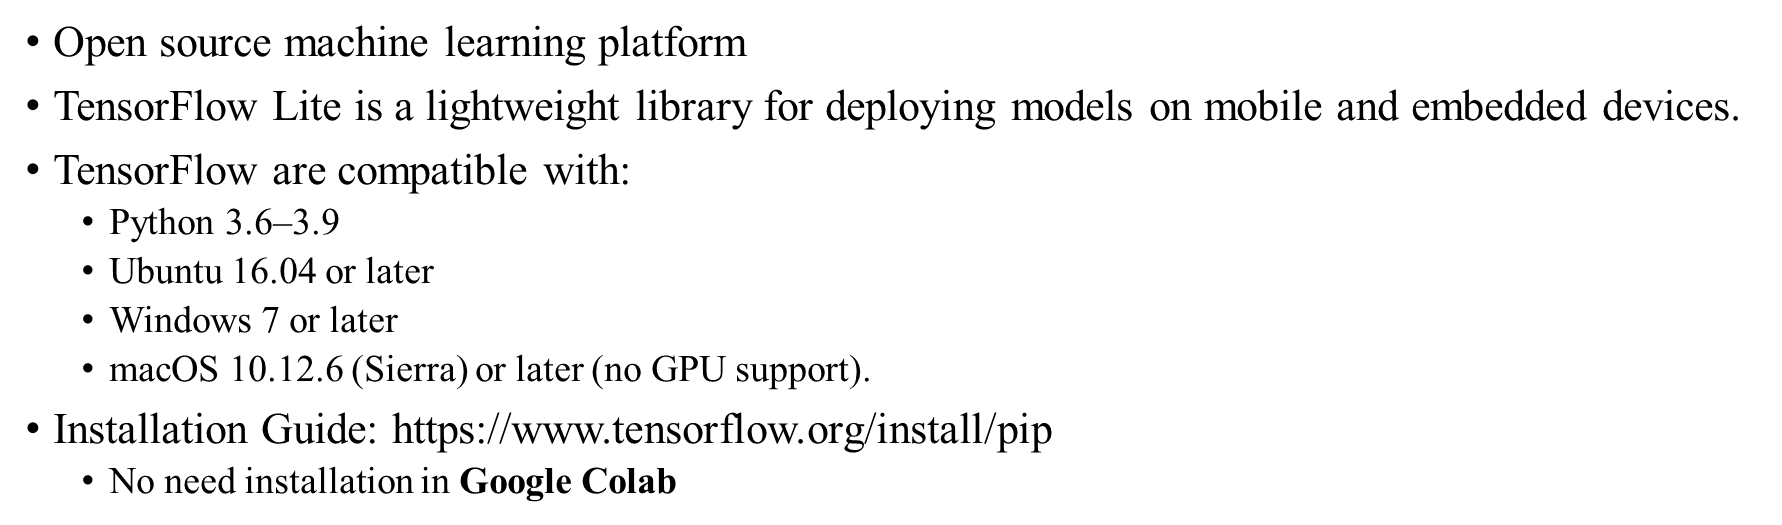

In [5]:
# TensorFlow and tf.keras
#https://www.tensorflow.org/tutorials/keras/classification
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape


(60000, 28, 28)

In [9]:
len(train_labels)


60000

In [10]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape


(10000, 28, 28)

In [12]:
len(test_labels)


10000

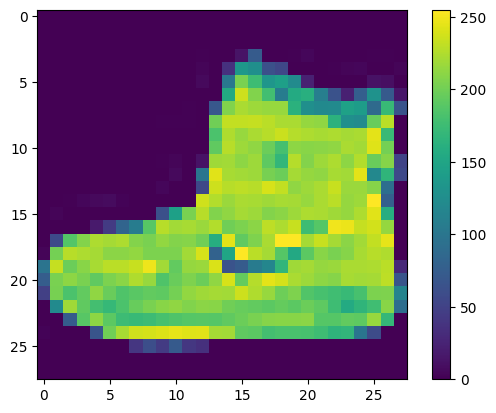

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

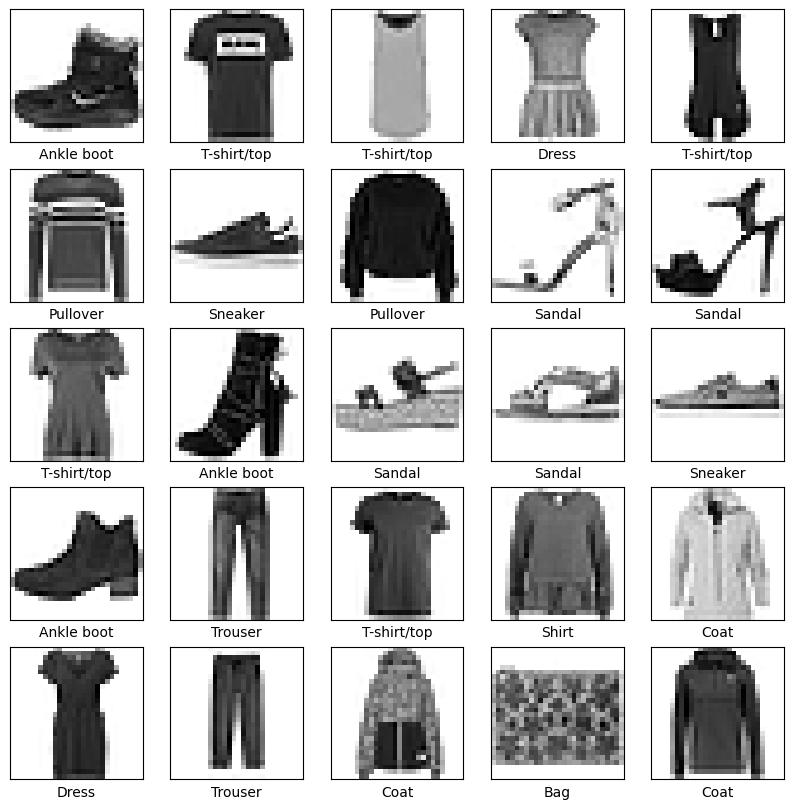

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4960 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3741 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3351 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3255 - accuracy: 0.8876 - 783ms/epoch - 3ms/step

Test accuracy: 0.8876000046730042


In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 1ms/step


In [23]:
predictions[0]


array([2.5528493e-06, 5.9451909e-11, 5.3646770e-10, 4.8263952e-11,
       3.4393150e-08, 8.9511246e-04, 1.7247122e-06, 2.1368612e-03,
       1.4958864e-07, 9.9696356e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])


9

In [25]:
test_labels[0]


9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

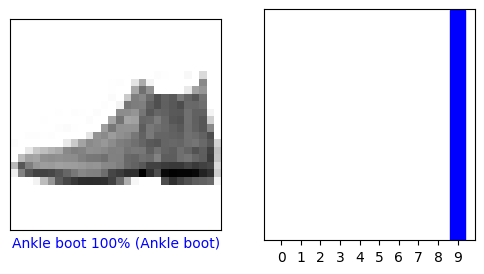

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

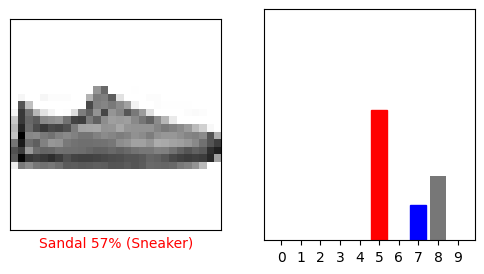

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

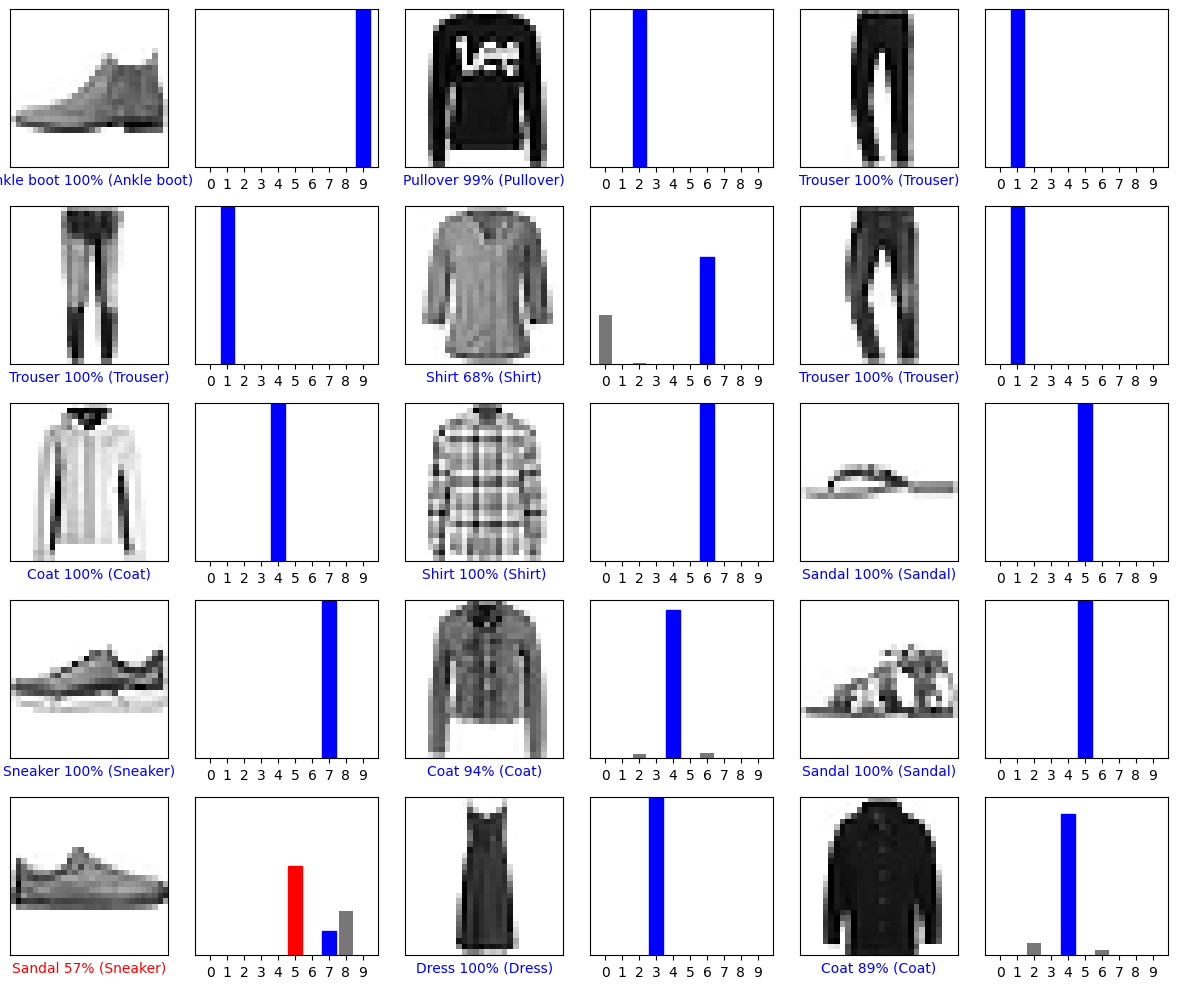

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()